In [1]:
import pandas as pd
df=pd.read_csv('../Datasets/1airtel_comments_analysis_final.csv')

In [2]:
df.head()

,commentAuthor,commentLikesCount,commentText,commentTimestamp,postCommentsCount,postDescription,postLikesCount,postTimestamp,postUrl,profileDescription,profileFollowers,profileName,profileUrl,sentiment/finalClassification,sentiment/finalScore,sentiment/negativeScore,sentiment/neutralScore,sentiment/positiveScore,targetPlatform
0,Zika Chi,7,Airtel Nigeria kindly fix your network it is q...,2024-11-16T10:28:36.000Z,233,Experience crystal-clear calls with VoLTE. \n\...,2047,2024-11-15T09:59:02.000Z,https://www.facebook.com/airtelng/posts/pfbid0...,NaN,3079672,Airtel Nigeria | Lagos,https://www.facebook.com/airtelng,negative,0.914784,0.914784,0.075327,0.009889,facebook
1,Akapson Jeremiah,2,"Your network for calls is so annoying,really n...",2024-11-15T13:41:42.000Z,233,Experience crystal-clear calls with VoLTE. \n\...,2047,2024-11-15T09:59:02.000Z,https://www.facebook.com/airtelng/posts/pfbid0...,NaN,3079672,Airtel Nigeria | Lagos,https://www.facebook.com/airtelng,negative,0.939654,0.939654,0.053068,0.007278,facebook
2,Amaechi Sharon,2,"For hours, my Airtel has been on emergency... ...",2024-11-16T12:51:53.000Z,233,Experience crystal-clear calls with VoLTE. \n\...,2047,2024-11-15T09:59:02.000Z,https://www.facebook.com/airtelng/posts/pfbid0...,NaN,3079672,Airtel Nigeria | Lagos,https://www.facebook.com/airtelng,negative,0.730052,0.730052,0.236193,0.033756,facebook
3,Menti Ravy,1,"Airtel I swear my God will punish you people,I...",2024-11-15T15:09:35.000Z,233,Experience crystal-clear calls with VoLTE. \n\...,2047,2024-11-15T09:59:02.000Z,https://www.facebook.com/airtelng/posts/pfbid0...,NaN,3079672,Airtel Nigeria | Lagos,https://www.facebook.com/airtelng,negative,0.896282,0.896282,0.093976,0.009743,facebook
4,Jide Jones Famuwagun,0,"More than 24hrs after subscription, I still ca...",2024-11-17T14:45:31.000Z,233,Experience crystal-clear calls with VoLTE. \n\...,2047,2024-11-15T09:59:02.000Z,https://www.facebook.com/airtelng/posts/pfbid0...,NaN,3079672,Airtel Nigeria | Lagos,https://www.facebook.com/airtelng,negative,0.812319,0.812319,0.173854,0.013827,facebook


In [4]:
print(len(df))

6290


In [12]:
#total unique commentor
import numpy as np
print(len(np.unique(df['commentAuthor'])))

4183


In [13]:
# Count the occurrences of each commenter
comment_counts = df['commentAuthor'].value_counts()

# Get the highest commenter
highest_commenter = comment_counts.idxmax()
highest_comment_count = comment_counts.max()

print(f"The highest commenter is: {highest_commenter} with {highest_comment_count} comments.")

The highest commenter is: Caleb Okomayin with 43 comments.


In [15]:
# Count the occurrences of each commenter
comment_counts = df['commentAuthor'].value_counts()

# Get the top 5 commenters
top_5_commenters = comment_counts.head(5)

# Print the results
print("Top 5 commenters and their comment counts:")
for commenter, count in top_5_commenters.items():
    print(f"{commenter}: {count} comments")


Top 5 commenters and their comment counts:
Caleb Okomayin: 43 comments
Emmanuel Ishola Olowoyo: 35 comments
Babatunde Olufemi Adamolekun: 29 comments
Inji Stephen Lonewolf Makama: 21 comments
Dav Obasi: 17 comments


In [16]:
import pandas as pd

# Count the occurrences of each commenter
comment_counts = df['commentAuthor'].value_counts()

# Get the top 5 commenters
top_5_commenters = comment_counts.head(5)

# Create a DataFrame for the top 5 commenters
top_5_table = pd.DataFrame({
    'Commenter': top_5_commenters.index,
    'Comment Count': top_5_commenters.values
})

# Print the table
print(top_5_table)


                      Commenter  Comment Count
0                Caleb Okomayin             43
1       Emmanuel Ishola Olowoyo             35
2  Babatunde Olufemi Adamolekun             29
3  Inji Stephen Lonewolf Makama             21
4                     Dav Obasi             17


In [19]:
# Group by 'commentAuthor' and sum the 'postCommentsCount' to count all comments for each user
comment_counts = df.groupby('commentAuthor')['postCommentsCount'].sum()

# Sort by comment counts in descending order
sorted_comment_counts = comment_counts.sort_values(ascending=False)

# Get the top 5 commenters
top_5_commenters = sorted_comment_counts.head(5)

# Create a DataFrame for the top 5 commenters
top_5_table = pd.DataFrame({
    'Commenter': top_5_commenters.index,
    'Comment Count': top_5_commenters.values
})

# Print the table
print(top_5_table)

                      Commenter  Comment Count
0                Caleb Okomayin          32295
1  Babatunde Olufemi Adamolekun          12221
2       Emmanuel Ishola Olowoyo          11722
3  Inji Stephen Lonewolf Makama           7914
4         Oluwadamilare Gabriel           6467


In [20]:


# Convert commentTimestamp to datetime
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])

# Filter out 'MTN Nigeria' from the dataset
df = df[df['commentAuthor'] != 'MTN Nigeria']

# Extract the month and year from the commentTimestamp
df['month_year'] = df['commentTimestamp'].dt.to_period('M')

# Group by commentAuthor and month_year, then sum the comments count
monthly_comments = df.groupby(['commentAuthor', 'month_year'])['postCommentsCount'].sum().reset_index()

# Find the highest contributor for each month
highest_contributors = monthly_comments.loc[monthly_comments.groupby('month_year')['postCommentsCount'].idxmax()]

# Display the results
print("Highest contributors for each month (excluding 'MTN Nigeria'):")
print(highest_contributors)

Highest contributors for each month (excluding 'MTN Nigeria'):
                commentAuthor month_year  postCommentsCount
322            Akolade Israel    2024-08               3684
807            Caleb Okomayin    2024-09              32295
1406  Emmanuel Ishola Olowoyo    2024-10               4597
1516   Etz Sighting Guy Ebube    2024-11               4091
2232        Janikowski comedy    2024-12               3992


C:\Users\LCT\AppData\Local\Temp\ipykernel_13980\3900795745.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


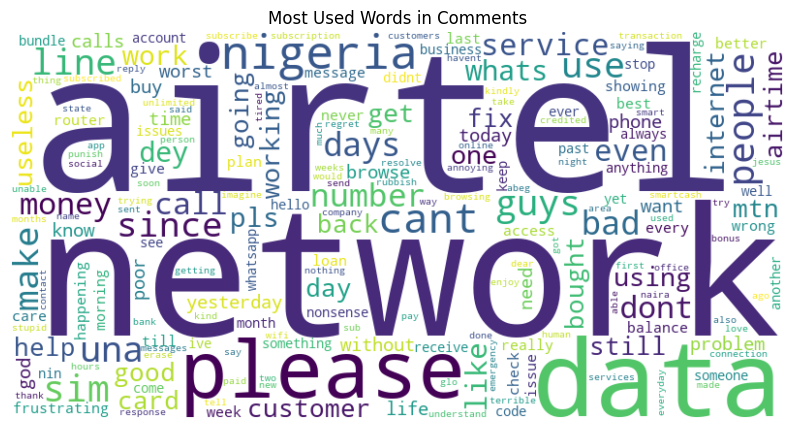

Top 20 Most Common Words in Comments:
airtel: 3420
network: 2784
data: 1632
please: 1066
nigeria: 1040
cant: 802
people: 623
sim: 616
line: 580
una: 565
use: 561
guys: 546
since: 528
make: 518
bad: 461
days: 456
number: 423
call: 408
money: 398
dont: 386


In [23]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already done
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# df = pd.read_csv('your_file.csv')  # Uncomment this line if loading from a CSV file

# Combine all comment texts into a single string
all_comments = " ".join(df['commentText'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.lower()                  # Convert to lowercase
    return text

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 10 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


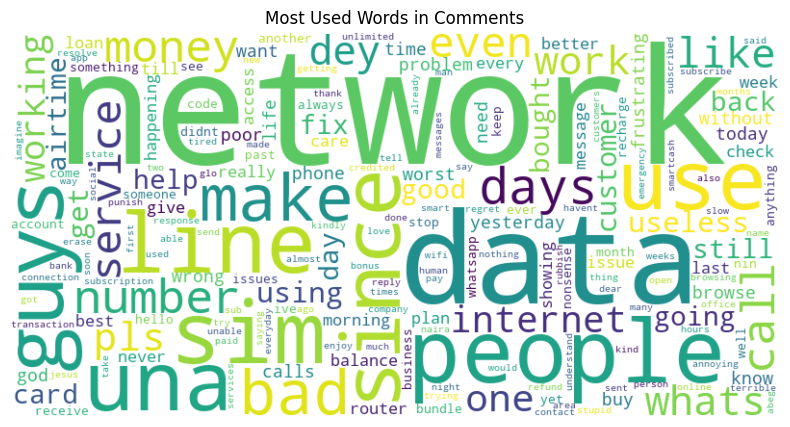

Top 20 Most Common Words in Comments:
network: 2784
data: 1632
people: 623
sim: 616
line: 580
una: 565
use: 561
guys: 546
since: 528
make: 518
bad: 461
days: 456
number: 423
call: 408
money: 398
even: 364
service: 360
like: 334
whats: 320
dey: 319


In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords and tokenizer data if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (assuming it's named df and already loaded with the given columns)
# Uncomment and update this line to load your data
# df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with the actual file path

# Combine all comment texts into a single string
all_comments = " ".join(df['commentText'].dropna())

# Text cleaning function
def preprocess_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    text = text.lower()                  # Convert to lowercase
    return text.strip()

# Apply preprocessing
cleaned_text = preprocess_text(all_comments)

# Tokenize words
words = word_tokenize(cleaned_text)

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['mtn', 'airtel', 'nigeria', 'other', 
                         'can', 'cant', 'do', 'dont', 'please'])  # Add specific words to exclude

# Remove stopwords
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 2]  # Exclude stopwords and short words

# Count word frequency
word_counts = Counter(filtered_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Comments')
plt.show()

# Print the 20 most common words
most_common_words = word_counts.most_common(20)
print("Top 20 Most Common Words in Comments:")
for word, count in most_common_words:
    print(f"{word}: {count}")


In [5]:
df.columns

Index(['commentAuthor', 'commentLikesCount', 'commentText', 'commentTimestamp',
       'postCommentsCount', 'postDescription', 'postLikesCount',
       'postTimestamp', 'postUrl', 'profileDescription', 'profileFollowers',
       'profileName', 'profileUrl', 'sentiment/finalClassification',
       'sentiment/finalScore', 'sentiment/negativeScore',
       'sentiment/neutralScore', 'sentiment/positiveScore', 'targetPlatform'],
      dtype='object')